# Задание 2
В файлах PRODUCT_LIST.CSV и SALE_LIST.CSV содержатся сведения о том, как некоторая продукция была востребована в ресторанной сети. С помощью разнообразных описательных статистик сравните товары и рестораны.


In [190]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
%matplotlib inline

In [191]:
df_product_list = pd.read_csv('PRODUCT_LIST.csv', sep=";", header = 0, index_col=False)
df_sale_list = pd.read_csv('SALE_LIST.csv', sep=";", header = 0, index_col=False)

In [192]:
df_product_list.head()

,product_code,product_name
0,821001,Кофе ЭСПРЕССО 30 мл
1,821002,Кофе ДОППИО 60мл
2,821003,Кофе РИСТРЕТТО 20 мл
3,821004,Фильтр кофе Верньяно250мл
4,821005,Кофе ЛУНГО 50 мл


In [193]:
df_product_list.dtypes

product_code     int64
product_name    object
dtype: object

In [194]:
df_product_list.shape

(9786, 2)

In [195]:
df_sale_list.head()

,date,product_code,rest_code,product_count
0,06.01.2009,824021,Озерный,4
1,06.01.2009,824068,Озерный,1
2,06.01.2009,824070,Озерный,2
3,06.01.2009,824073,Озерный,1
4,06.01.2009,824074,Озерный,1


In [196]:
df_sale_list.shape

(135920, 4)

In [197]:
df_sale_list.dtypes

date             object
product_code      int64
rest_code        object
product_count     int64
dtype: object

In [198]:
df_sale_list['date'] = pd.to_datetime(df_sale_list['date'], format='%d.%m.%Y')
df_sale_list.dtypes

date             datetime64[ns]
product_code              int64
rest_code                object
product_count             int64
dtype: object

In [199]:
df_sale_list.describe()

,product_code,product_count
count,135920.000000,135920.000000
mean,839804.895917,11.376663
std,28968.345316,18.153321
min,821001.000000,-6.000000
25%,822006.000000,2.000000
50%,824074.000000,5.000000
75%,862094.000000,12.000000
max,894098.000000,239.000000


In [200]:
df_sales = pd.merge(df_product_list, df_sale_list, on='product_code')
df_sales.head()

,product_code,product_name,date,rest_code,product_count
0,821001,Кофе ЭСПРЕССО 30 мл,2009-01-06,Озерный,7
1,821001,Кофе ЭСПРЕССО 30 мл,2009-01-07,Озерный,2
2,821001,Кофе ЭСПРЕССО 30 мл,2009-01-08,Озерный,5
3,821001,Кофе ЭСПРЕССО 30 мл,2009-01-09,Озерный,8
4,821001,Кофе ЭСПРЕССО 30 мл,2009-01-10,Озерный,8


In [201]:
df_sales.shape

(135920, 5)

In [202]:
df_y_m_gr = df_sales.groupby([df_sales.date.dt.year, df_sales.date.dt.month]).agg({'product_count': 'sum'})
df_y_m_gr.index.names = ['year', 'month']
df_y_m_gr.reset_index(inplace=True)
df_y_m_gr.head()

,year,month,product_count
0,2009,1,20604
1,2009,2,21487
2,2009,3,24440
3,2009,4,26869
4,2009,5,27871


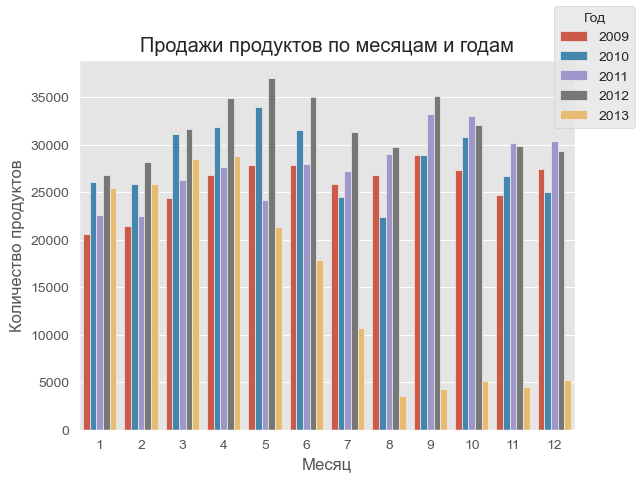

In [203]:
fig, ax = plt.subplots()
g = sns.barplot(ax=ax, data=df_y_m_gr, x="month", y="product_count", hue='year')
g.legend_.remove()
fig.legend(title='Год')
plt.title('Продажи продуктов по месяцам и годам')
plt.xlabel('Месяц')
plt.ylabel('Количество продуктов')
plt.show()

In [204]:
df_r_y_gr = df_sales.groupby([df_sales.rest_code, df_sales.date.dt.year]).agg({'product_count': 'sum'})
df_r_y_gr.index.names = ['rest_code', 'year']
df_r_y_gr.reset_index(inplace=True)
df_r_y_gr.head()

,rest_code,year,product_count
0,Мечта,2009,251686
1,Мечта,2010,278505
2,Мечта,2011,275637
3,Мечта,2012,320849
4,Мечта,2013,127757


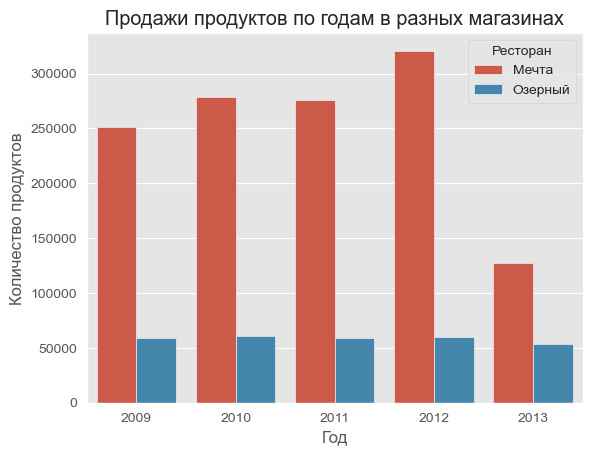

In [205]:
fig, ax = plt.subplots()
sns.barplot(ax=ax, data=df_r_y_gr, x="year", y="product_count", hue='rest_code')
ax.legend(title='Ресторан')
plt.title('Продажи продуктов по годам в разных магазинах')
plt.xlabel('Год')
plt.ylabel('Количество продуктов')
plt.show()

In [206]:
df_pr_gr = df_sales.groupby(df_sales.product_name)\
                .agg({'product_count': 'sum'})\
                .sort_values('product_count', ascending=False)\
                .reset_index().head(30)
df_pr_gr.head()

,product_name,product_count
0,Кофе КАПУЧИНО 150мл,177515
1,Кофе Латте 300мл,174315
2,Кофе АМЕРИКАНО 90мл,115652
3,Кофе ЭСПРЕССО 30 мл,115551
4,Раф кофе 300мл,77722


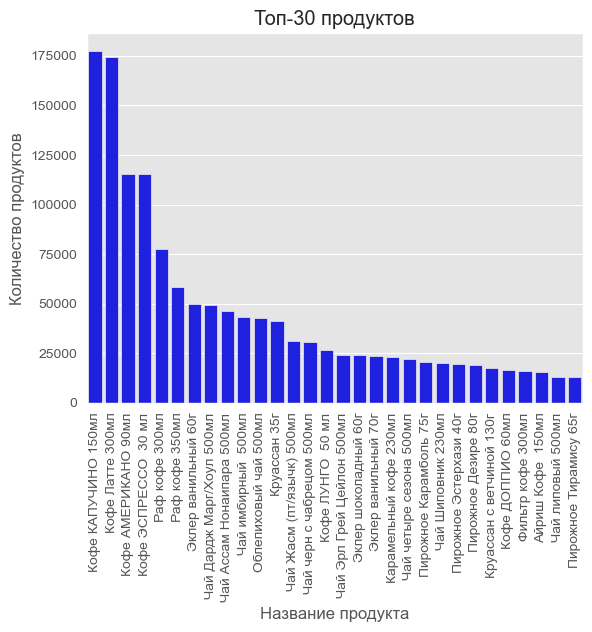

In [207]:
fig, ax = plt.subplots()
sns.barplot(ax=ax, data=df_pr_gr, x="product_name", y="product_count", color='blue')
plt.title('Топ-30 продуктов')
plt.xlabel('Название продукта')
plt.ylabel('Количество продуктов')
plt.xticks(rotation=90)
plt.show()

In [208]:
df_r_pr_gr = df_sales.groupby([df_sales.rest_code, df_sales.product_name])\
                .agg({'product_count': 'sum'})\
                .sort_values('product_count', ascending=False)\
                .reset_index().head(30)
df_r_pr_gr.head()

,rest_code,product_name,product_count
0,Мечта,Кофе Латте 300мл,143037
1,Мечта,Кофе КАПУЧИНО 150мл,138546
2,Мечта,Кофе АМЕРИКАНО 90мл,91865
3,Мечта,Кофе ЭСПРЕССО 30 мл,91759
4,Мечта,Раф кофе 300мл,66077


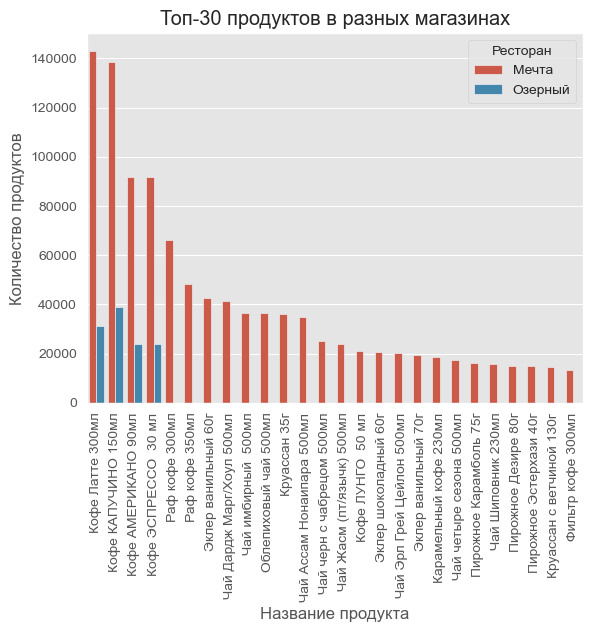

In [209]:
fig, ax = plt.subplots()
sns.barplot(ax=ax, data=df_r_pr_gr, x="product_name", y="product_count", hue='rest_code')
ax.legend(title='Ресторан', loc='upper right')
plt.title('Топ-30 продуктов в разных магазинах')
plt.xlabel('Название продукта')
plt.ylabel('Количество продуктов')
plt.xticks(rotation=90)
plt.show()